In [8]:
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

### 파일로드

In [2]:
customers = pd.read_csv("data/olist_customers_dataset.csv", encoding="utf-8")
categorys = pd.read_csv("data/product_category_name_translation.csv", encoding="utf-8")
products = pd.read_csv("data/olist_products_dataset.csv", encoding="utf-8")
orders = pd.read_csv("data/olist_orders_dataset.csv", encoding="utf-8")
order_items = pd.read_csv("data/olist_order_items_dataset.csv", encoding="utf-8")
payments = pd.read_csv("data/olist_order_payments_dataset.csv", encoding="utf-8")
reviews = pd.read_csv("data/olist_order_reviews_dataset.csv", encoding="utf-8")
sellers = pd.read_csv("data/olist_sellers_dataset.csv", encoding="utf-8")
geolocation = pd.read_csv("data/olist_geolocation_dataset.csv", encoding="utf-8")

#### 1. olist 고객 제품구매 시간대 분석 => 기획전 및 프로모션 시간 결정에 참고

### 제품 구매 시간대 분석

1) 데이터 불러오기

In [55]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


2) 전처리

In [12]:
import missingno as msno

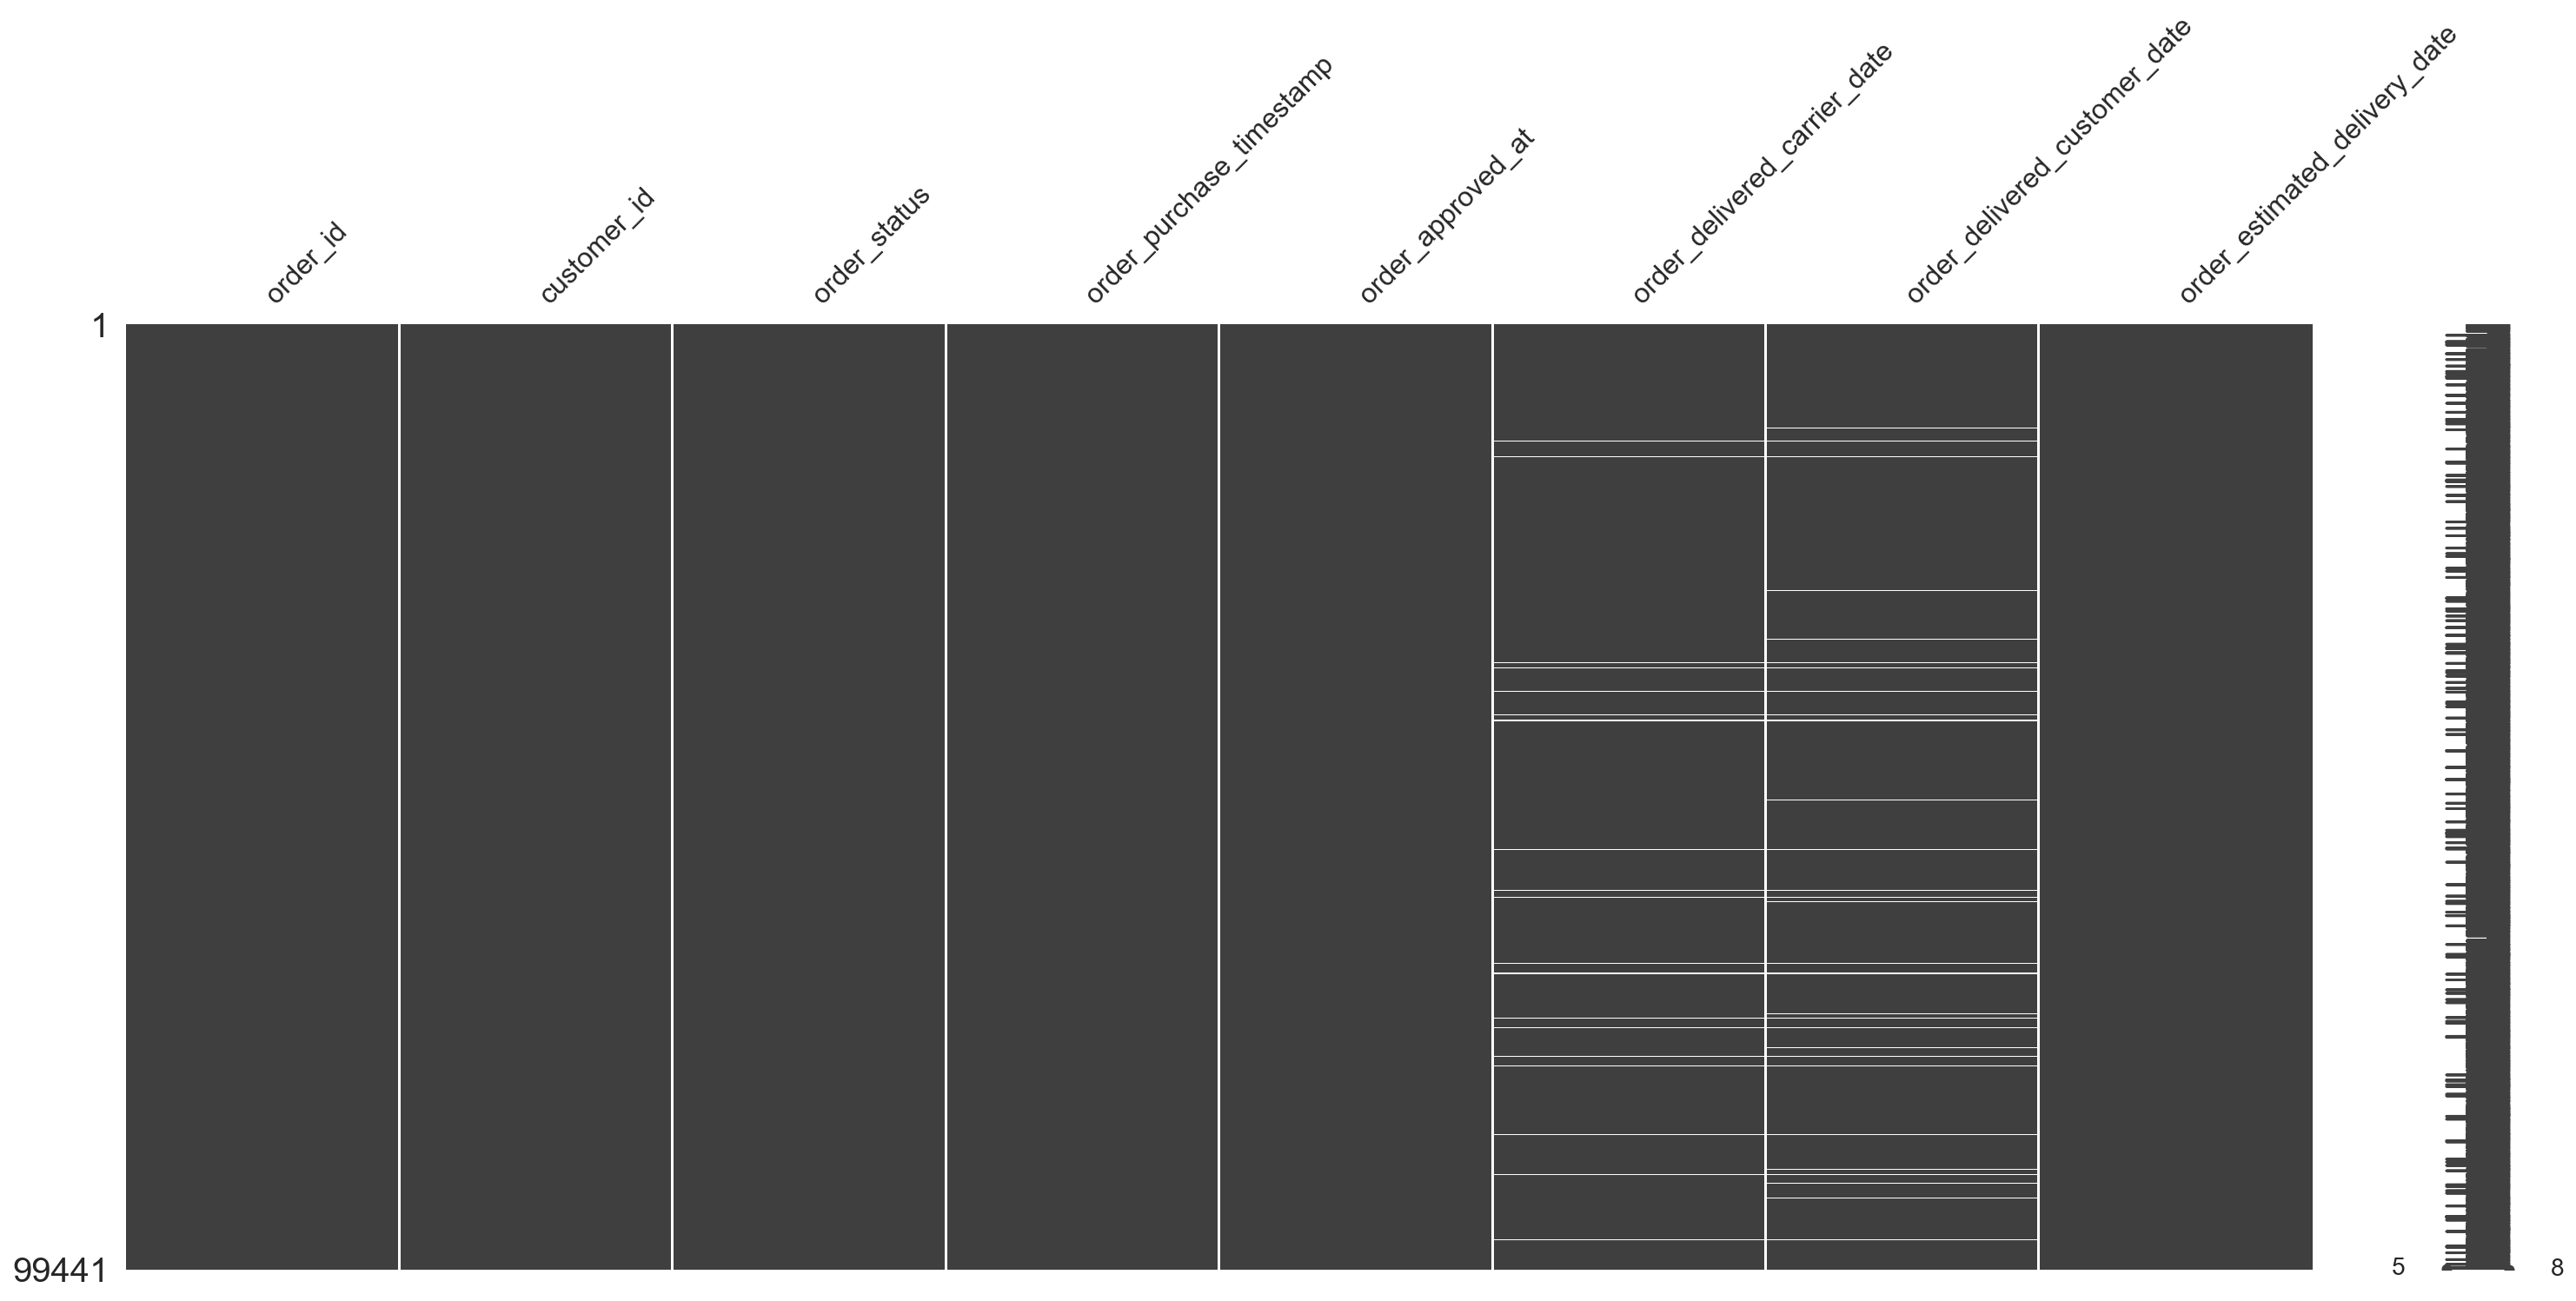

In [13]:
msno.matrix(orders)

In [56]:
orders.count()

order_id                         99441
customer_id                      99441
order_status                     99441
order_purchase_timestamp         99441
order_approved_at                99281
order_delivered_carrier_date     97658
order_delivered_customer_date    96476
order_estimated_delivery_date    99441
dtype: int64

In [103]:
order_time = orders['order_purchase_timestamp'].apply(lambda x : x.split(" ")[-1])                                                    
order_day = orders['order_purchase_timestamp'].apply(lambda x : x.split(" ")[0])

orders.count()



order_id                         99441
customer_id                      99441
order_status                     99441
order_purchase_timestamp         99441
order_approved_at                99281
order_delivered_carrier_date     97658
order_delivered_customer_date    96476
order_estimated_delivery_date    99441
orders_time                      99441
order_hour                       99441
orders_day                       99441
dtype: int64

In [104]:
orders['orders_time'] = order_time
orders['orders_day'] = order_day

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,orders_time,order_hour,orders_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,10:56:33,10,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,20:41:37,20,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,08:38:49,08,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,19:28:06,19,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,21:18:39,21,2018-02-13


In [64]:
order_time = orders['orders_time'].apply(lambda x : x.split(":")[0])                                                    
orders['order_hour'] = order_time


orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,orders_time,order_hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,10:56:33,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,20:41:37,20
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,08:38:49,08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,19:28:06,19
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,21:18:39,21


In [89]:
result_df = orders.groupby('order_hour').size().reset_index(name="count")
result_df

,order_hour,count
0,00,2394
1,01,1170
2,02,510
3,03,272
4,04,206
5,05,188
6,06,502
7,07,1231
8,08,2967
9,09,4785


3)시각화 - 시간대별 구매 수 

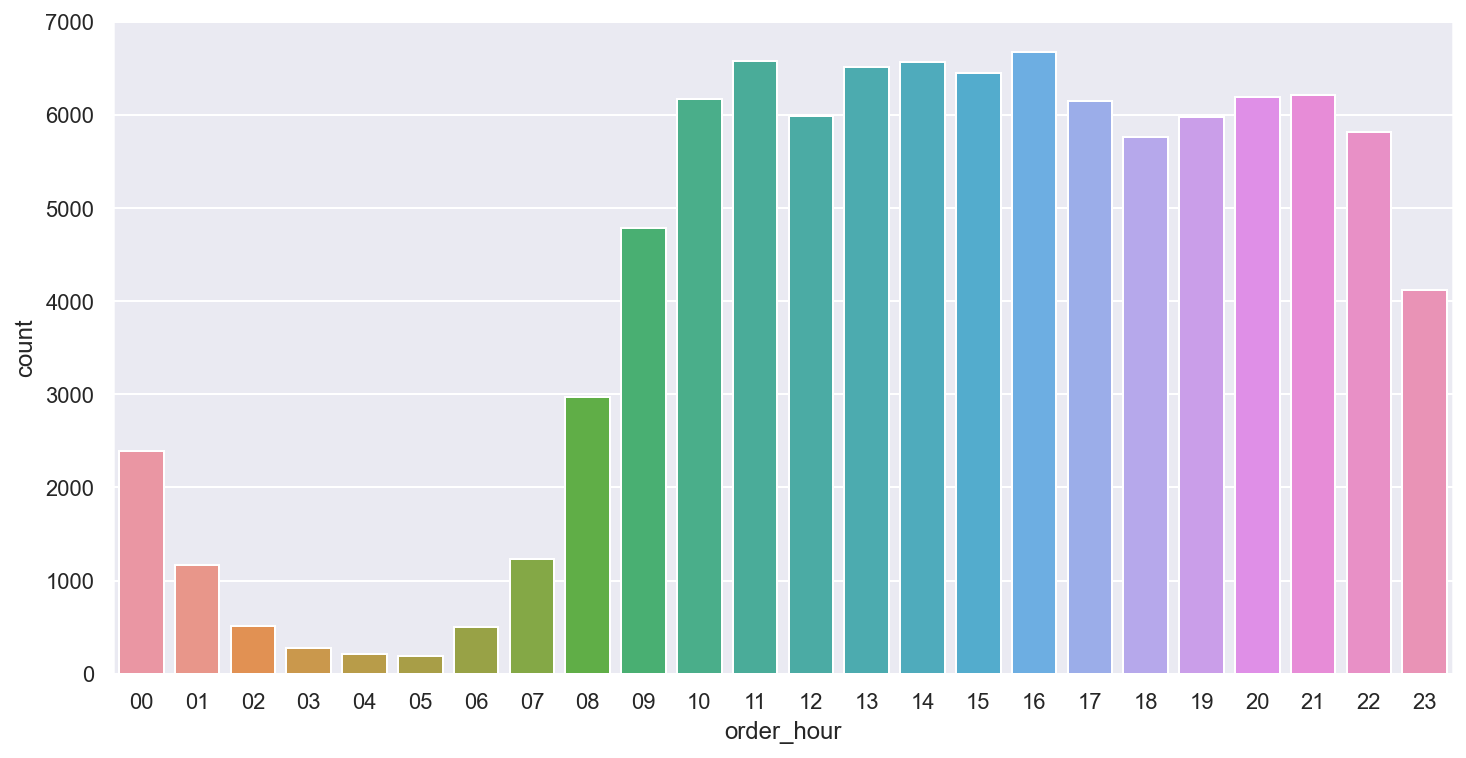

In [95]:
plt.figure(figsize=(12,6))
sns.barplot(x="order_hour",y="count",data=result_df)
plt.show()

### 월별 구매수

In [106]:
order_month = orders['orders_day'].apply(lambda x : x.split("-")[1])  
orders['orders_month'] = order_month
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,orders_time,order_hour,orders_day,orders_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,10:56:33,10,2017-10-02,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,20:41:37,20,2018-07-24,07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,08:38:49,08,2018-08-08,08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,19:28:06,19,2017-11-18,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,21:18:39,21,2018-02-13,02


In [109]:
result_df2 = orders.groupby('orders_month').size().reset_index(name="count")
result_df2

,orders_month,count
0,01,8069
1,02,8508
2,03,9893
3,04,9343
4,05,10573
5,06,9412
6,07,10318
7,08,10843
8,09,4305
9,10,4959


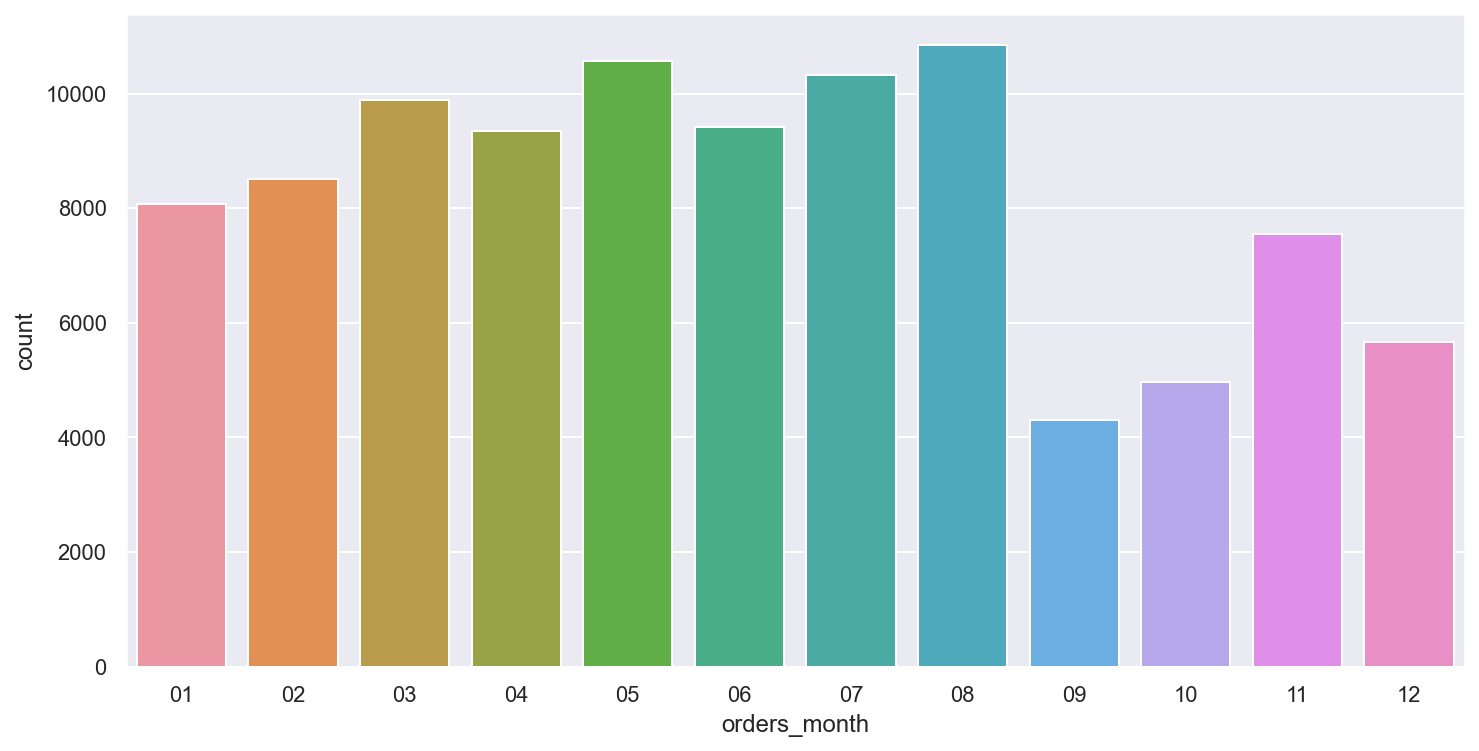

In [111]:
plt.figure(figsize=(12,6))
sns.barplot(x="ordesr_month",y="count",data=result_df2)
plt.show()

In [3]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [60]:
df = orders['order_purchase_timestamp']
df

0        2017-10-02 10:56:33
1        2018-07-24 20:41:37
2        2018-08-08 08:38:49
3        2017-11-18 19:28:06
4        2018-02-13 21:18:39
                ...         
99436    2017-03-09 09:54:05
99437    2018-02-06 12:58:58
99438    2017-08-27 14:46:43
99439    2018-01-08 21:28:27
99440    2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 99441, dtype: object

In [61]:
df1 = pd.to_datetime(df,format='%Y-%m-%d %H:%M:%S',errors='raise')
df1

0       2017-10-02 10:56:33
1       2018-07-24 20:41:37
2       2018-08-08 08:38:49
3       2017-11-18 19:28:06
4       2018-02-13 21:18:39
                ...        
99436   2017-03-09 09:54:05
99437   2018-02-06 12:58:58
99438   2017-08-27 14:46:43
99439   2018-01-08 21:28:27
99440   2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 99441, dtype: datetime64[ns]

In [62]:
r_df = pd.DataFrame(df1)
r_df

,order_purchase_timestamp
0,2017-10-02 10:56:33
1,2018-07-24 20:41:37
2,2018-08-08 08:38:49
3,2017-11-18 19:28:06
4,2018-02-13 21:18:39
...,...
99436,2017-03-09 09:54:05
99437,2018-02-06 12:58:58
99438,2017-08-27 14:46:43
99439,2018-01-08 21:28:27


In [63]:
r_df['day_of_the_week'] = r_df['order_purchase_timestamp'].dt.strftime("%A")

In [64]:
r_df

,order_purchase_timestamp,day_of_the_week
0,2017-10-02 10:56:33,Monday
1,2018-07-24 20:41:37,Tuesday
2,2018-08-08 08:38:49,Wednesday
3,2017-11-18 19:28:06,Saturday
4,2018-02-13 21:18:39,Tuesday
...,...,...
99436,2017-03-09 09:54:05,Thursday
99437,2018-02-06 12:58:58,Tuesday
99438,2017-08-27 14:46:43,Sunday
99439,2018-01-08 21:28:27,Monday


In [65]:
그전에 금액과 건수가 있어야함 
1. 요일을 추출한 데이터를 요일별로 그룹바이 하기
2. 요일별로 월~일까지 추출한 데이터를 시간별로 구분해 그룹바이 하기 
3. 밑으로 합치기

SyntaxError: invalid syntax (<ipython-input-65-d606f541151e>, line 1)

In [67]:
r_df['hour'] = r_df['order_purchase_timestamp'].dt.hour
r_df

,order_purchase_timestamp,day_of_the_week,hour
0,2017-10-02 10:56:33,Monday,10
1,2018-07-24 20:41:37,Tuesday,20
2,2018-08-08 08:38:49,Wednesday,8
3,2017-11-18 19:28:06,Saturday,19
4,2018-02-13 21:18:39,Tuesday,21
...,...,...,...
99436,2017-03-09 09:54:05,Thursday,9
99437,2018-02-06 12:58:58,Tuesday,12
99438,2017-08-27 14:46:43,Sunday,14
99439,2018-01-08 21:28:27,Monday,21


In [68]:
m = r_df[r_df['day_of_the_week']=='Monday']
m

,order_purchase_timestamp,day_of_the_week,hour
0,2017-10-02 10:56:33,Monday,10
8,2017-01-23 18:29:09,Monday,18
20,2017-09-18 14:31:30,Monday,14
23,2018-01-08 07:55:29,Monday,7
26,2018-06-04 00:00:13,Monday,0
...,...,...,...
99403,2018-06-04 09:19:47,Monday,9
99407,2018-08-20 10:04:30,Monday,10
99419,2017-10-02 08:45:35,Monday,8
99426,2017-05-15 09:46:26,Monday,9


In [69]:
m_d = m.groupby('hour').size().reset_index(name="count")
m_d['day'] = 'Monday'
m_d

,hour,count,day
0,0,328,Monday
1,1,134,Monday
2,2,66,Monday
3,3,36,Monday
4,4,21,Monday
5,5,22,Monday
6,6,69,Monday
7,7,160,Monday
8,8,479,Monday
9,9,783,Monday


In [70]:
t = r_df[r_df['day_of_the_week']=='Tuesday']
t

,order_purchase_timestamp,day_of_the_week,hour
1,2018-07-24 20:41:37,Tuesday,20
4,2018-02-13 21:18:39,Tuesday,21
6,2017-04-11 12:22:08,Tuesday,12
7,2017-05-16 13:10:30,Tuesday,13
10,2017-05-16 19:41:10,Tuesday,19
...,...,...,...
99398,2018-06-26 21:40:46,Tuesday,21
99399,2017-07-18 12:42:28,Tuesday,12
99415,2017-10-10 10:50:03,Tuesday,10
99424,2017-11-21 20:18:03,Tuesday,20


In [71]:
t_d = t.groupby('hour').size().reset_index(name="count")
t_d['day'] = 'Tuesday'
t_d

,hour,count,day
0,0,306,Tuesday
1,1,158,Tuesday
2,2,80,Tuesday
3,3,28,Tuesday
4,4,29,Tuesday
5,5,24,Tuesday
6,6,71,Tuesday
7,7,223,Tuesday
8,8,522,Tuesday
9,9,864,Tuesday


In [72]:
w = r_df[r_df['day_of_the_week']=='Wednesday']
w

,order_purchase_timestamp,day_of_the_week,hour
2,2018-08-08 08:38:49,Wednesday,8
13,2018-07-25 17:44:10,Wednesday,17
28,2018-05-02 11:45:38,Wednesday,11
36,2018-02-21 18:15:12,Wednesday,18
49,2017-08-09 20:19:05,Wednesday,20
...,...,...,...
99420,2017-06-07 11:02:37,Wednesday,11
99421,2017-07-05 15:55:19,Wednesday,15
99425,2018-03-21 19:47:18,Wednesday,19
99432,2017-12-20 09:52:41,Wednesday,9


In [73]:
w_d = w.groupby('hour').size().reset_index(name="count")
w_d['day'] = 'Wednesday'
w_d

,hour,count,day
0,0,397,Wednesday
1,1,179,Wednesday
2,2,81,Wednesday
3,3,33,Wednesday
4,4,33,Wednesday
5,5,27,Wednesday
6,6,93,Wednesday
7,7,211,Wednesday
8,8,517,Wednesday
9,9,829,Wednesday


In [74]:
th = r_df[r_df['day_of_the_week']=='Thursday']
th

,order_purchase_timestamp,day_of_the_week,hour
11,2017-07-13 19:58:11,Thursday,19
12,2018-06-07 10:06:19,Thursday,10
14,2018-03-01 14:14:28,Thursday,14
15,2018-06-07 19:03:12,Thursday,19
19,2017-10-26 15:54:26,Thursday,15
...,...,...,...
99418,2017-11-30 17:54:28,Thursday,17
99423,2017-10-12 20:54:11,Thursday,20
99435,2017-02-23 09:05:12,Thursday,9
99436,2017-03-09 09:54:05,Thursday,9


In [75]:
th_d = th.groupby('hour').size().reset_index(name="count")
th_d['day'] = 'Thursday'
th_d

,hour,count,day
0,0,355,Thursday
1,1,167,Thursday
2,2,75,Thursday
3,3,39,Thursday
4,4,31,Thursday
5,5,28,Thursday
6,6,85,Thursday
7,7,220,Thursday
8,8,502,Thursday
9,9,758,Thursday


In [76]:
f = r_df[r_df['day_of_the_week']=='Friday']
f_d = f.groupby('hour').size().reset_index(name="count")
f_d['day'] = 'Friday'
f_d

,hour,count,day
0,0,426,Friday
1,1,216,Friday
2,2,72,Friday
3,3,49,Friday
4,4,40,Friday
5,5,36,Friday
6,6,97,Friday
7,7,206,Friday
8,8,493,Friday
9,9,768,Friday


In [77]:
sa = r_df[r_df['day_of_the_week']=='Saturday']
sa

,order_purchase_timestamp,day_of_the_week,hour
3,2017-11-18 19:28:06,Saturday,19
9,2017-07-29 11:55:02,Saturday,11
22,2018-02-03 20:37:35,Saturday,20
33,2018-02-03 12:38:58,Saturday,12
35,2018-02-17 15:59:46,Saturday,15
...,...,...,...
99375,2017-08-12 10:08:57,Saturday,10
99382,2018-07-14 20:17:16,Saturday,20
99385,2017-08-19 18:28:11,Saturday,18
99408,2017-05-20 11:43:49,Saturday,11


In [78]:
sa_d = sa.groupby('hour').size().reset_index(name="count")
sa_d['day'] = 'Saturday'
sa_d

,hour,count,day
0,0,315,Saturday
1,1,175,Saturday
2,2,67,Saturday
3,3,43,Saturday
4,4,25,Saturday
5,5,24,Saturday
6,6,53,Saturday
7,7,106,Saturday
8,8,249,Saturday
9,9,434,Saturday


In [79]:
su = r_df[r_df['day_of_the_week']=='Sunday']
su

,order_purchase_timestamp,day_of_the_week,hour
5,2017-07-09 21:57:05,Sunday,21
29,2018-02-25 13:50:30,Sunday,13
34,2018-07-29 23:34:51,Sunday,23
46,2017-05-14 20:28:25,Sunday,20
48,2018-07-29 11:24:17,Sunday,11
...,...,...,...
99413,2018-04-01 16:13:26,Sunday,16
99416,2018-06-03 18:44:31,Sunday,18
99429,2017-11-05 16:17:53,Sunday,16
99430,2018-03-04 22:48:38,Sunday,22


In [80]:
su_d = su.groupby('hour').size().reset_index(name="count")
su_d['day'] = 'Sunday'
su_d

,hour,count,day
0,0,267,Sunday
1,1,141,Sunday
2,2,69,Sunday
3,3,44,Sunday
4,4,27,Sunday
5,5,27,Sunday
6,6,34,Sunday
7,7,105,Sunday
8,8,205,Sunday
9,9,349,Sunday


## 결론!!!! - 요일로 구분된 각 시간대별 구매수

In [86]:
result_df = pd.concat([m_d,t_d,w_d,th_d,f_d,sa_d,su_d], axis=0)
result_df

,hour,count,day
0,0,328,Monday
1,1,134,Monday
2,2,66,Monday
3,3,36,Monday
4,4,21,Monday
...,...,...,...
19,19,899,Sunday
20,20,967,Sunday
21,21,889,Sunday
22,22,873,Sunday


In [138]:
purchase_by_day = result_df.pivot("hour","day", "count")
purchase_by_day = df_final[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]
purchase_by_day

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
0,328,306,397,355,426,315,267
1,134,158,179,167,216,175,141
2,66,80,81,75,72,67,69
3,36,28,33,39,49,43,44
4,21,29,33,31,40,25,27
5,22,24,27,28,36,24,27
6,69,71,93,85,97,53,34
7,160,223,211,220,206,106,105
8,479,522,517,502,493,249,205


In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams["axes.unicode_minus"]=False

f_path = "/Library/Fonts/Arial Unicode.ttf"
font_name=font_manager.FontProperties(fname=f_path).get_name()
rc("font",family=font_name)

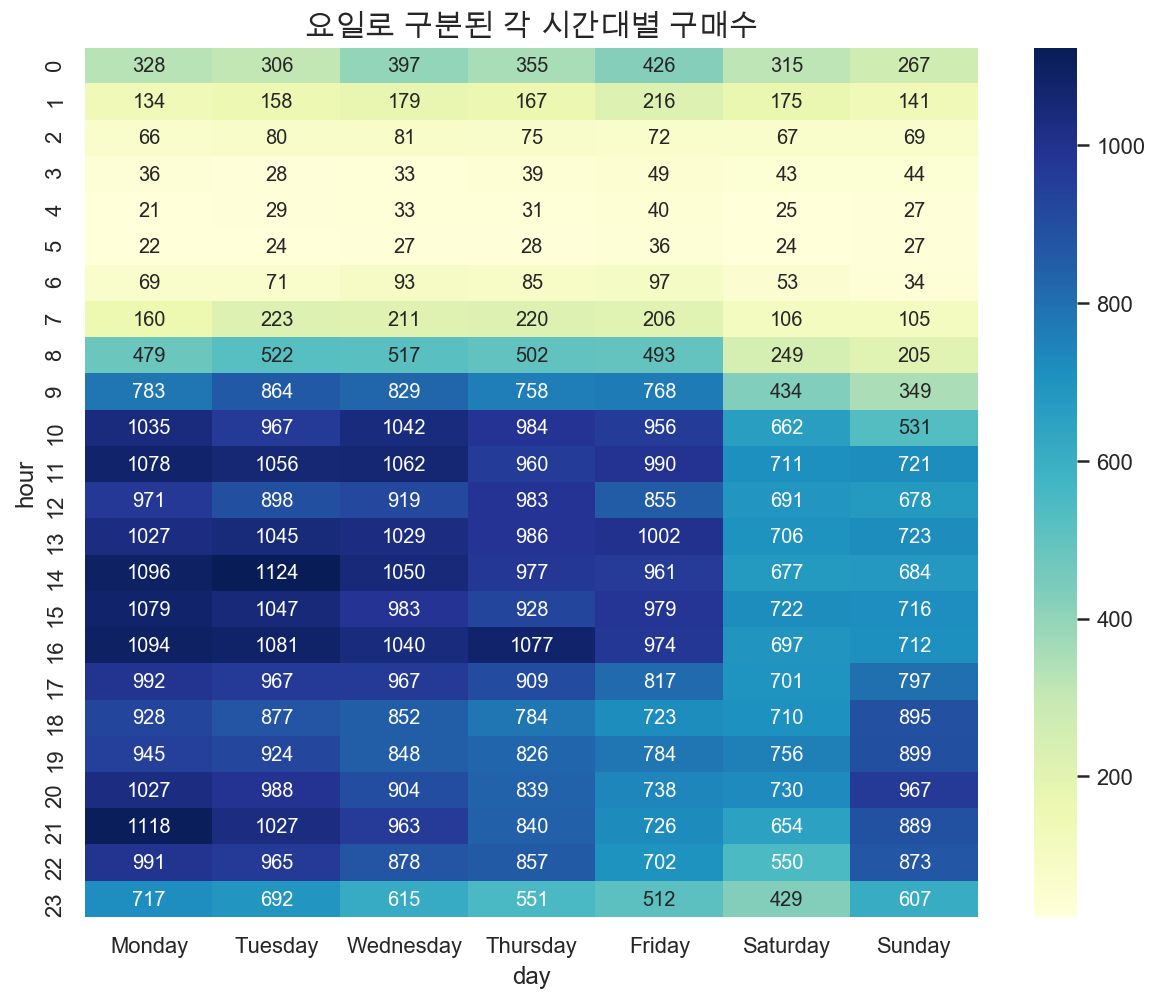

In [139]:
plt.figure(figsize=(10,8))
sns.heatmap(purchase_by_day,annot=True,fmt="d",cmap="YlGnBu")
plt.xticks(np.arange(0.5, len(df_final.columns), 1), purchase_by_day.columns)
plt.yticks(np.arange(0.5, len(df_final.index), 1), purchase_by_day.index)
plt.title("요일로 구분된 각 시간대별 구매수", fontsize=15)
plt.show()

In [ ]:
월별 카테고리 구매 건수 및 금액 데이터 탐색

## 참조) 요일별 구매수

In [98]:
count_day = r_df.groupby('day_of_the_week').size().reset_index(name="count").sort_values(by='count',ascending=False)
count_day

,day_of_the_week,count
1,Monday,16196
5,Tuesday,15963
6,Wednesday,15552
4,Thursday,14761
0,Friday,14122
3,Sunday,11960
2,Saturday,10887


In [2]:
customers = pd.read_csv("data/olist_customers_dataset.csv", encoding="utf-8")
categorys = pd.read_csv("data/product_category_name_translation.csv", encoding="utf-8")
products = pd.read_csv("data/olist_products_dataset.csv", encoding="utf-8")
orders = pd.read_csv("data/olist_orders_dataset.csv", encoding="utf-8")
order_items = pd.read_csv("data/olist_order_items_dataset.csv", encoding="utf-8")
payments = pd.read_csv("data/olist_order_payments_dataset.csv", encoding="utf-8")
reviews = pd.read_csv("data/olist_order_reviews_dataset.csv", encoding="utf-8")
sellers = pd.read_csv("data/olist_sellers_dataset.csv", encoding="utf-8")
geolocation = pd.read_csv("data/olist_geolocation_dataset.csv", encoding="utf-8")

In [169]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [168]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [173]:
pd.merge(customers, orders, on='customer_id')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


In [174]:
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [172]:
len(orders["order_id"].unique())

99441

In [57]:
result4.tail(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
119149,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1.0,credit_card,...,1175.0,22.0,13.0,18.0,e262b3f92d1ce917aa412a9406cf61a6,5,NaN,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08
119150,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1.0,debit_card,...,150.0,16.0,7.0,15.0,dc9c59b4688062c25758c2be4cafc523,5,NaN,NaN,2018-03-17 00:00:00,2018-03-17 16:33:31


In [47]:
customers.tail(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


In [48]:
categorys.tail(2)

,product_category_name,product_category_name_english
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services


In [49]:
products.tail(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0


In [50]:
order_items.tail(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


In [130]:
price = order_items["price"].sum()
price

13591643.700000003

In [51]:
orders.tail(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


In [149]:
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [150]:
a=payments.groupby("order_id")[['payment_sequential','payment_installments',"payment_value"]].count(

SyntaxError: invalid syntax (<ipython-input-150-1994c1a0d577>, line 2)

In [144]:
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [53]:
sellers.tail(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
3094,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP


In [54]:
geolocation.tail(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1000161,99980,-28.388932,-51.846871,david canabarro,RS
1000162,99950,-28.070104,-52.018658,tapejara,RS


In [55]:
reviews.tail(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43
99999,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49


In [131]:
result = pd.merge(orders,payments, on = "order_id")
result1 = pd.merge(result,customers, on = "customer_id")
result2 = pd.merge(result1,order_items, on = "order_id")
result3 = pd.merge(result2,products, on = "product_id")
result4 = pd.merge(result3, reviews, on = "order_id")

result4

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,500.0,19.0,8.0,13.0,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,500.0,19.0,8.0,13.0,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,1,credit_card,...,2800.0,28.0,23.0,23.0,f5453b3d33358ed459eb4312392b96a8,4,NaN,NaN,2017-08-24 00:00:00,2017-08-25 11:38:19
118311,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,1,credit_card,...,2800.0,28.0,23.0,23.0,f5453b3d33358ed459eb4312392b96a8,4,NaN,NaN,2017-08-24 00:00:00,2017-08-25 11:38:19
118312,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,1,credit_card,...,300.0,16.0,6.0,12.0,8ea780895f362ce949029f95b7181ff0,1,NaN,"Ele não é um mini cajon, é um shaker, ou seja,...",2018-01-19 00:00:00,2018-01-21 02:51:39
118313,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,credit_card,...,1175.0,22.0,13.0,18.0,e262b3f92d1ce917aa412a9406cf61a6,5,NaN,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08


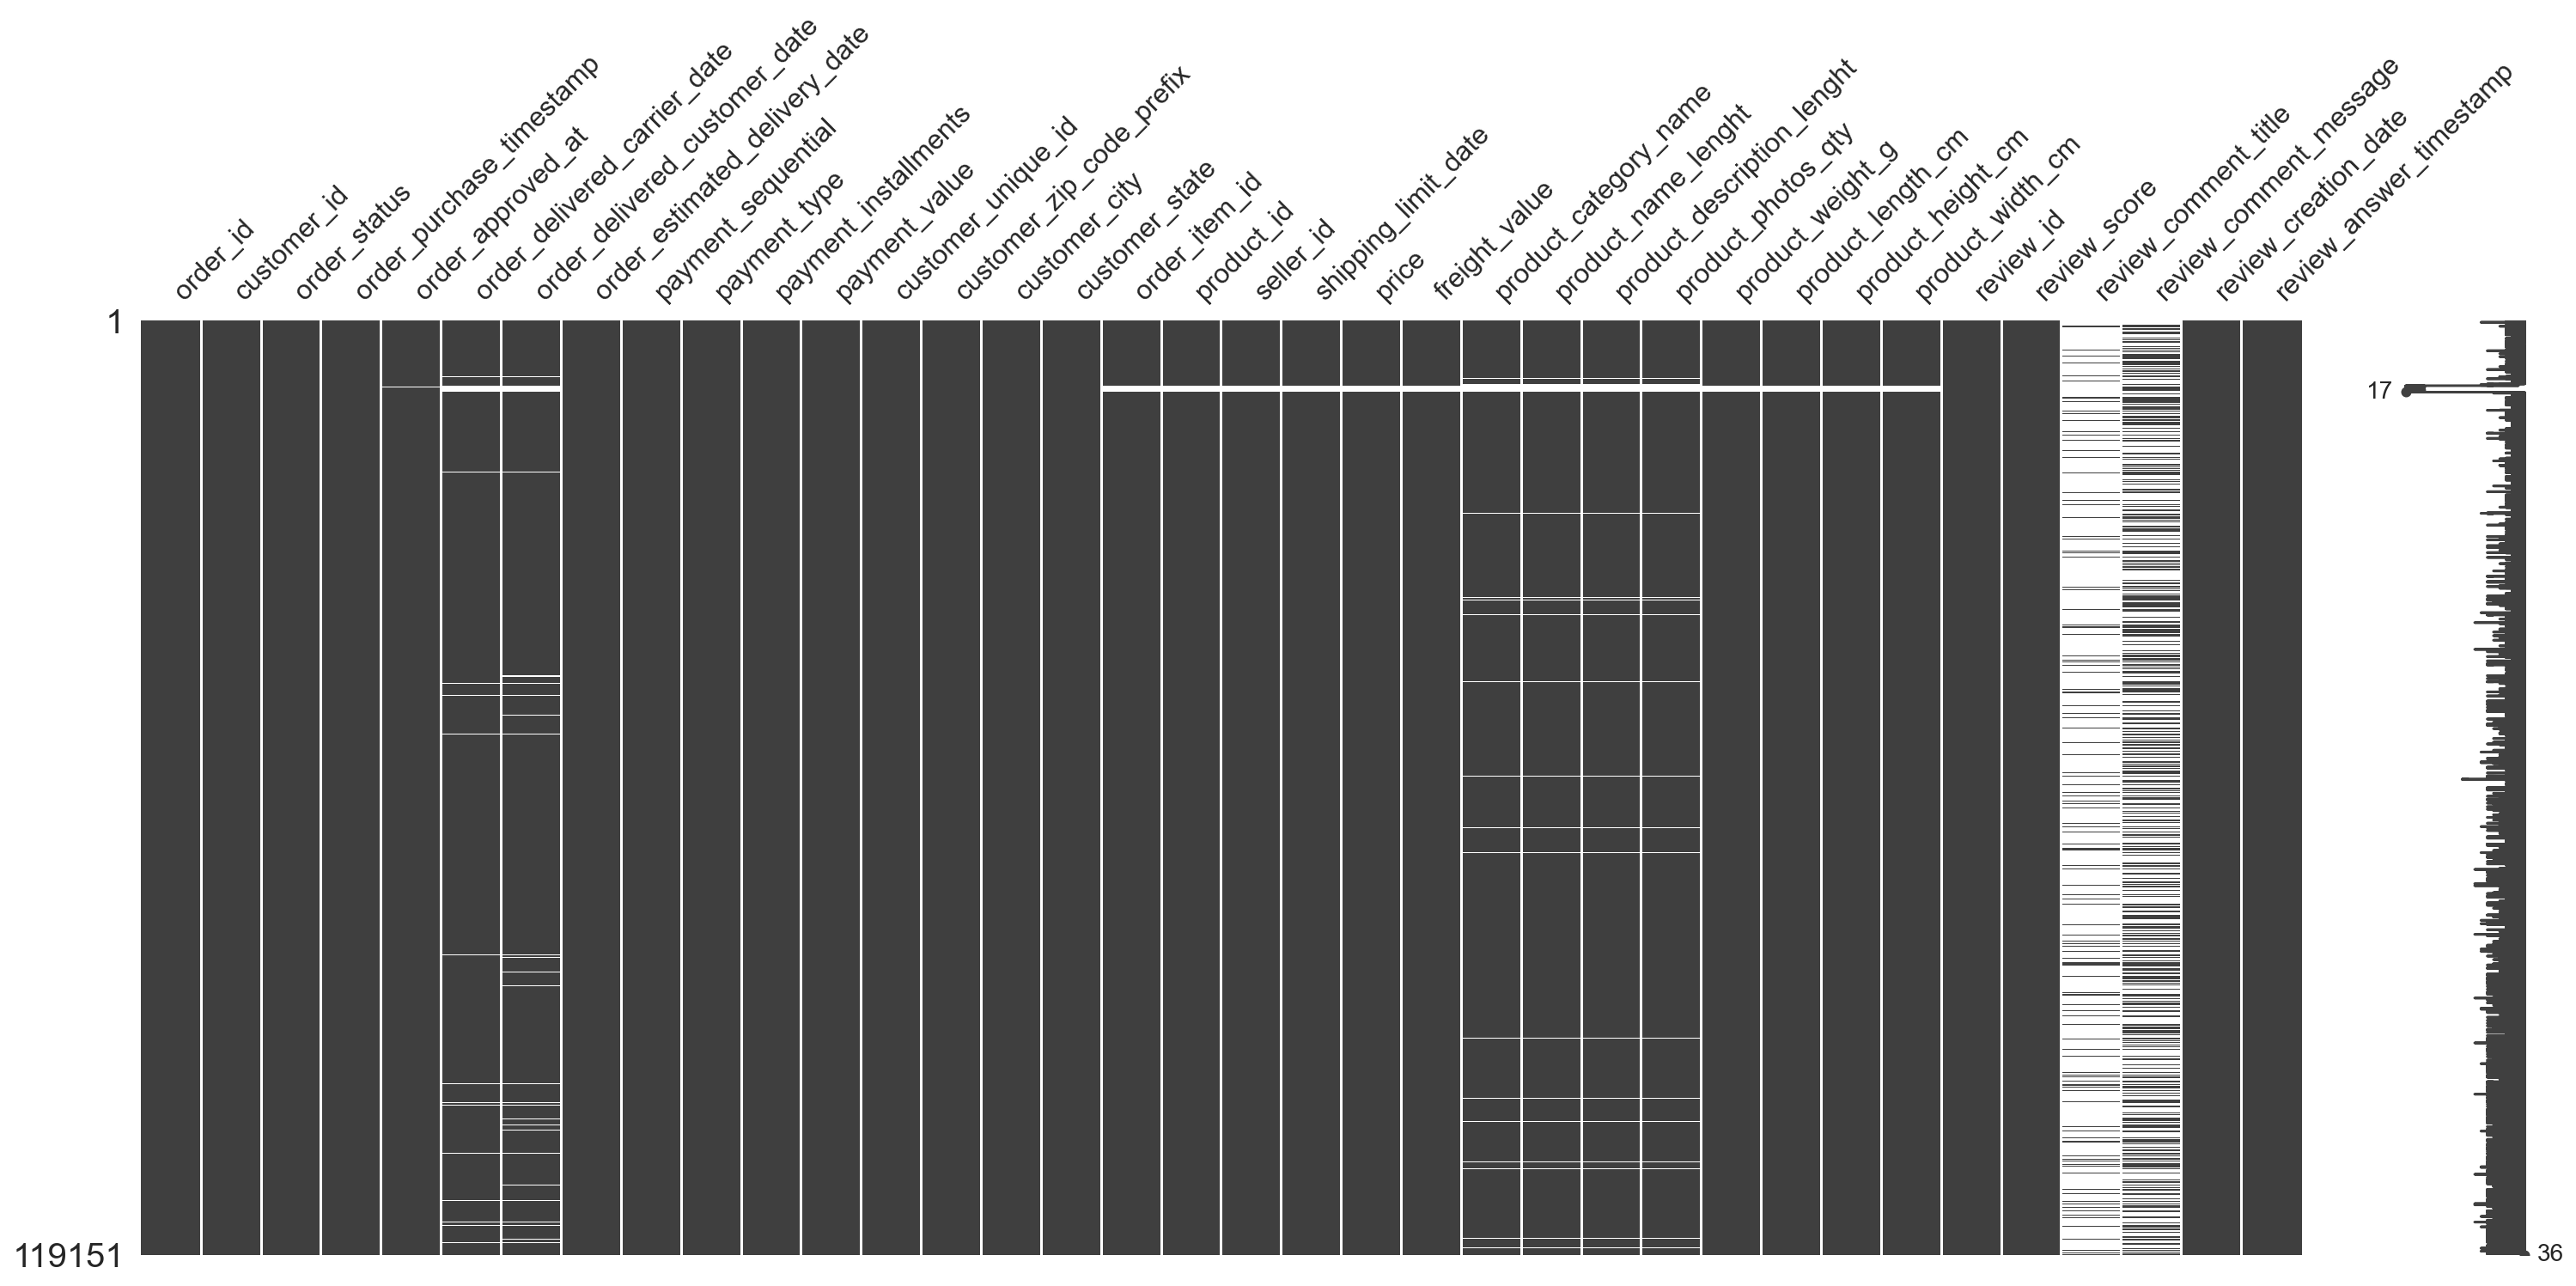

In [44]:
msno.matrix(result4)

In [137]:
result4_final = result4.drop(["product_weight_g","product_length_cm","product_height_cm","product_width_cm","review_comment_title","review_comment_message","product_name_lenght","product_description_lenght","product_photos_qty","review_creation_date","review_answer_timestamp","review_id"],axis=1)
result4_final

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,4
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,4
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,4
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,4
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,1,credit_card,...,sao paulo,SP,1,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2017-08-17 21:35:26,356.00,18.12,esporte_lazer,4
118311,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,1,credit_card,...,sao paulo,SP,2,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,2017-08-17 21:35:26,356.00,18.12,esporte_lazer,4
118312,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,1,credit_card,...,campo do tenente,PR,1,3d2c44374ee42b3003a470f3e937a2ea,ce248b21cb2adc36282ede306b7660e5,2017-12-27 10:09:52,55.90,15.14,instrumentos_musicais,1
118313,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,credit_card,...,sao jose dos campos,SP,1,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 09:54:05,72.00,13.08,beleza_saude,5


In [ ]:
고객 만족도에 따른 분석 

1. 배송이 빠른가?
2. 만족도가 높은 카테고리는?
3. 그것이 특정 셀러와 연관이 있을까?



In [ ]:
데이터 처리 => outer join해서 처리하기 
캐글 참조해보기

In [ ]:
판매량에 가장 연계가 되어있는 것 

In [ ]:
groupby로 유니크한 애들만 줄여서 나가거나 다 해보는 것이 중요함

In [ ]:
order 겹쳤다면 - group by -> 전반적으로 크게 변화가 없다면 진행하기 

In [ ]:
payment groupby 해서 order해서 merge 하면 됨 => payment만 merge 하기!

In [ ]:
문제점 해결도 코멘트 남

In [ ]:
duplicate